In [1]:
from glob import glob
from astropy.io import fits

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9)
sns.set_style("darkgrid")

In [3]:
from ipywidgets import IntProgress
from IPython.display import display

In [4]:
frames = sorted(glob("data/M81/*/*.fits"))

In [5]:
prog = IntProgress(min=0, max=len(frames))
display(prog)
land = 0
for frame in frames:
    x = fits.getval(frame, "NAXIS1")
    y = fits.getval(frame, "NAXIS2")
    if y > x:
        expa = fits.PrimaryHDU()
        head = fits.getheader(frame)
        data = fits.getdata(frame)
        head["NAXIS1"] = y
        head["NAXIS2"] = x
        head["COMMENT"] = "#EOV"
        fits.writeto(frame, data.T, head, overwrite=True)
    else:
        land += 1
    prog.value += 1

Widget Javascript not detected.  It may not be installed or enabled properly.


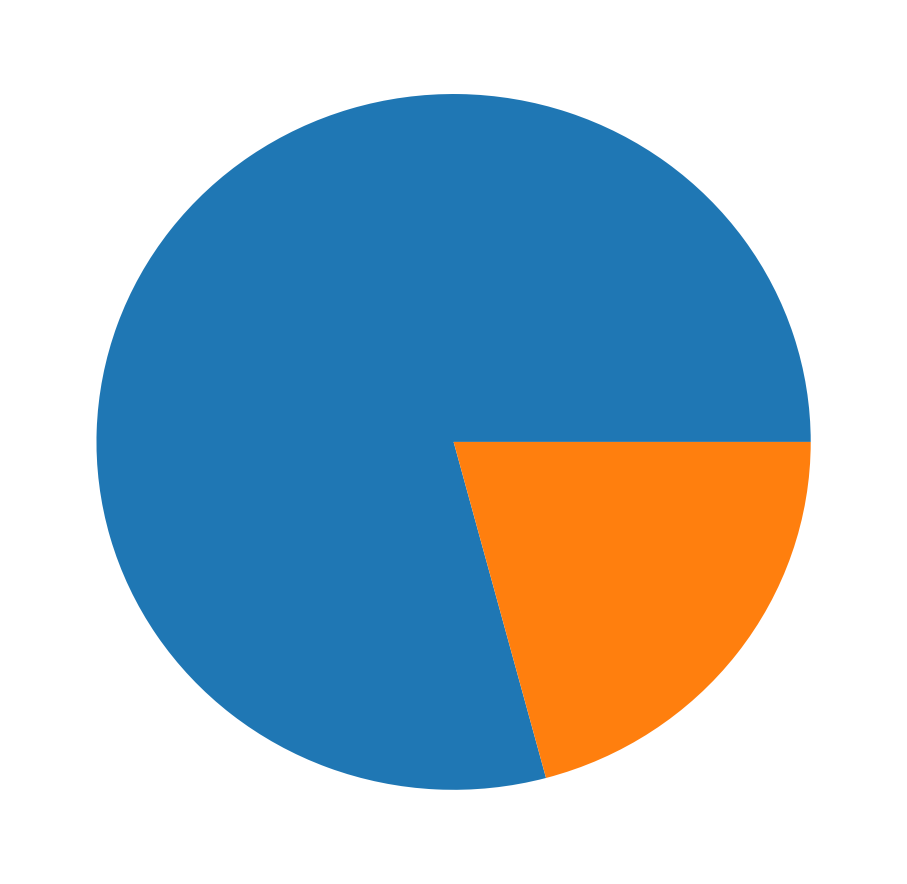

In [6]:
plt.figure(figsize=(16, 16))
plt.pie([len(frames)-land, land]);